# Solution - Problem Set 2

## Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz

\### Import data

In [ ]:
# You will need the shared Google drive https://drive.google.com/drive/u/1/folders/0ALmMMRrzz_-5Uk9PVA
from google.colab import drive
drive.mount("/content/drive")
!mkdir -p datashim
!cp /content/drive/Shareddrives/DS602-F22/Data/data602.py ./datashim
from datashim import data602

Mounted at /content/drive


In [ ]:
cdf = data602.read_citations()
wdf = data602.read_weather()

## Question 1

Using the `weather` dataset, construct a derived data frame having the following qualities:

1. Each row represents an observation day
2. Each column represents an hourly temperature observation.  That is, the dataframe includes 24 columns of the form `tmpmeasx`	where x ranges from 0 to 23 and represents the observation taken that hour.  (For changes from daylight savings time to standard time, there are two observations at the 1:00 hour (local).  You may discard one of the values arbitrarily.)

In [ ]:
# get dataset
w = (wdf
  .assign(dt = wdf.date.dt.date)
  .assign(hr = wdf.date.dt.hour)
)[["dt", "hr", "tmp_meas"]]

# find and remove duplicate entries
w = w[~w.duplicated(["dt", "hr"])]

# reshape
wpv = w.pivot(index = "dt", columns="hr", values="tmp_meas")
#rename columns
wpv.columns = [f"tmpmeas{x}" if type(x) is int else x for x in wpv.columns]
wpv

,tmpmeas0,tmpmeas1,tmpmeas2,tmpmeas3,tmpmeas4,tmpmeas5,tmpmeas6,tmpmeas7,tmpmeas8,tmpmeas9,tmpmeas10,tmpmeas11,tmpmeas12,tmpmeas13,tmpmeas14,tmpmeas15,tmpmeas16,tmpmeas17,tmpmeas18,tmpmeas19,tmpmeas20,tmpmeas21,tmpmeas22,tmpmeas23
dt,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,6.1,6.7,6.1,5.6
2016-01-01,5.0,4.4,3.9,3.3,3.3,4.4,3.9,3.9,4.4,5.6,5.6,6.7,6.7,6.1,5.6,5.0,4.4,3.9,2.2,1.1,0.6,-0.6,0.6,0.6
2016-01-02,-0.6,-1.7,-1.7,-0.6,-2.8,-2.2,-2.8,-2.2,1.1,3.3,5.0,6.1,7.2,8.3,8.3,7.8,6.1,3.9,2.2,1.7,0.6,0.0,-1.1,-1.7
2016-01-03,-1.7,-1.7,-2.2,-2.8,-2.8,-0.6,-1.1,-2.8,1.7,5.6,7.8,9.4,10.0,10.0,11.1,10.6,8.9,5.6,3.9,2.8,1.7,0.6,0.0,-1.1
2016-01-04,-2.2,-1.7,-2.8,-1.7,0.0,0.0,0.6,0.6,0.6,0.0,1.1,2.2,2.2,1.7,1.1,0.0,-1.7,-2.2,-2.8,-3.3,-5.0,-6.1,-7.2,-8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-12,26.7,26.7,26.1,25.6,25.6,25.0,25.6,26.1,28.3,30.0,30.6,32.2,33.3,33.3,34.4,35.0,34.4,33.3,32.2,28.9,27.8,27.2,27.8,26.1
2021-07-13,26.1,26.1,25.0,24.4,25.6,25.6,25.6,27.2,28.9,31.1,32.2,33.3,33.3,34.4,34.4,35.0,34.4,34.4,32.8,31.7,30.6,29.4,28.9,28.3
2021-07-14,28.3,27.8,27.8,26.7,26.1,24.4,25.6,27.8,29.4,31.7,32.8,33.3,34.4,33.3,33.9,34.4,31.7,29.4,28.9,28.3,26.1,25.6,24.4,23.9


Using this derived dataset, show the average difference in temperature, standard deviation, and max/min values between observations taken in hours 2 (about 2:56am) and 14 (about 14:56, or 2:56pm).

In [ ]:
delta = wpv.tmpmeas14 - wpv.tmpmeas2
delta.describe()

count    2018.000000
mean        7.053122
std         4.846646
min       -12.200000
25%         3.900000
50%         7.200000
75%        10.500000
max        22.800000
dtype: float64

The average temperature delta is 7.05°C, with a standard deviation of 4.8°C.  The lowest delta is -12.2°C, and highest is 22.8°C.

(Not required for scoring: the lowest delta occured on 25 December 2020, when the temperature dropped throughout the day along the Eastern U.S.  The highest delta was recorded on Feb 18, 2017, where the temperature increased from -1.7°C at the 2am reading to 21.1°C at the 2pm reading.)

In [ ]:
wpv.loc[[delta.idxmin(), delta.idxmax()]]

,tmpmeas0,tmpmeas1,tmpmeas2,tmpmeas3,tmpmeas4,tmpmeas5,tmpmeas6,tmpmeas7,tmpmeas8,tmpmeas9,tmpmeas10,tmpmeas11,tmpmeas12,tmpmeas13,tmpmeas14,tmpmeas15,tmpmeas16,tmpmeas17,tmpmeas18,tmpmeas19,tmpmeas20,tmpmeas21,tmpmeas22,tmpmeas23
dt,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-25,14.4,13.3,12.8,8.9,6.1,2.8,1.7,1.1,1.1,1.1,0.0,0.0,0.0,0.0,0.6,-0.6,-1.1,-1.1,-2.2,-3.3,-3.9,-3.9,-3.9,-4.4
2017-02-18,-1.1,-2.2,-1.7,-1.7,-2.2,-1.7,-2.8,1.7,6.1,11.1,16.1,19.4,20.0,20.6,21.1,20.6,19.4,17.8,16.1,12.8,11.1,14.4,15.0,13.9


## Question 2

Circular data and One-Hot Encoding} Open and clean the `citations` data frame using the script provided, and discard records where the violation timestamp is not between January 1, 2020 and July 1, 2021.


In [ ]:
c = cdf[(cdf.violdate.dt.date >= datetime(2020,1,1).date()) 
      & (cdf.violdate.dt.date < datetime(2021,7,1).date())]

In [ ]:
c

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl
2627,130278,19213CD,MD,27,No Stop/Park Street Cleaning,52,2021-06-06 23:40:00-04:00,"(39.28997272, -76.61002178)",2021-06-06 23:40:00
2632,130344,9EL0846,MD,3,Obstruct/Impeding Flow of Traffic,102,2021-04-03 02:59:00-04:00,<NA>,2021-04-03 02:59:00
2633,130393,2EG0053,MD,3,Obstruct/Impeding Flow of Traffic,102,2021-04-11 01:30:00-04:00,<NA>,2021-04-11 01:30:00
2634,130427,13381CK,MD,3,Obstruct/Impeding Flow of Traffic,102,2021-04-11 01:35:00-04:00,<NA>,2021-04-11 01:35:00
2635,130435,1EC9345,MD,3,Obstruct/Impeding Flow of Traffic,102,2021-04-11 01:36:00-04:00,<NA>,2021-04-11 01:36:00
...,...,...,...,...,...,...,...,...,...
3444247,78829488,6CR1677,MD,22,Expired Tags,32,2021-01-27 13:30:00-05:00,<NA>,2021-01-27 13:30:00
3444248,78829496,751026,MD,8,No Stopping/Standing Tow Away Zone,52,2021-01-27 13:39:00-05:00,<NA>,2021-01-27 13:39:00
3452403,79827523,HIPY83,FL,8,No Stopping/Standing Tow Away Zone,52,2020-07-31 12:00:00-04:00,<NA>,2020-07-31 12:00:00
3452404,79827531,9DH4142,MD,99,All Other Stopping or Parking Violations,32,2021-03-16 08:00:00-04:00,<NA>,2021-03-16 08:00:00


Identify the 5 most common violation types.  Remove from the derivative data frame any violation types not in these 5 most common

In [ ]:
c = c[c.violcode.isin(c["violcode"].value_counts().head(5).index)]

In [ ]:
c

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl
2640,130484,3DM4068,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2021-06-04 01:35:00-04:00,"(39.28865729, -76.61323964)",2021-06-04 01:35:00
7318,515841,7DD3863,MD,18,All Other Parking Meter Violations,32,2020-05-27 11:15:00-04:00,<NA>,2020-05-27 11:15:00
8776,604827,1ED9532,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2021-03-10 09:36:00-05:00,<NA>,2021-03-10 09:36:00
8818,608240,2CB7909,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2020-11-22 15:50:00-05:00,<NA>,2020-11-22 15:50:00
18361,1213206,9AT4802,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2021-04-16 07:55:00-04:00,<NA>,2021-04-16 07:55:00
...,...,...,...,...,...,...,...,...,...
3387562,69999515,1EL2879,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2021-06-16 11:23:00-04:00,"(39.29417728, -76.61859607)",2021-06-16 11:23:00
3387563,69999523,72533CJ,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2021-06-16 11:26:00-04:00,"(39.29417728, -76.61859607)",2021-06-16 11:26:00
3387564,69999531,5DL3983,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2021-06-16 11:28:00-04:00,"(39.29417728, -76.61859607)",2021-06-16 11:28:00
3387565,69999549,3BV4229,MD,18,All Other Parking Meter Violations,32,2021-06-16 11:34:00-04:00,"(39.29417728, -76.61859607)",2021-06-16 11:34:00


Identify the average time of day for each violation in the derivative data frame.  (You must use the circular mean to compute this average.)

In [ ]:
def timetotheta(hr: int, min: int) -> float:
  ratio = (hr * 60 + min) / (23*60+60)
  return ratio * 2 * np.pi

c["timetheta"] = c.apply(lambda r: 
                         timetotheta(r["violdate"].hour, r["violdate"].minute),
                         axis=1)

In [ ]:
c["ctheta"] = np.cos(c.timetheta)
c["stheta"] = np.sin(c.timetheta)

In [ ]:
c

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl,timetheta,ctheta,stheta
2640,130484,3DM4068,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2021-06-04 01:35:00-04:00,"(39.28865729, -76.61323964)",2021-06-04 01:35:00,0.414516,0.915311,0.402747
7318,515841,7DD3863,MD,18,All Other Parking Meter Violations,32,2020-05-27 11:15:00-04:00,<NA>,2020-05-27 11:15:00,2.945243,-0.980785,0.195090
8776,604827,1ED9532,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2021-03-10 09:36:00-05:00,<NA>,2021-03-10 09:36:00,2.513274,-0.809017,0.587785
8818,608240,2CB7909,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2020-11-22 15:50:00-05:00,<NA>,2020-11-22 15:50:00,4.145157,-0.537300,-0.843391
18361,1213206,9AT4802,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2021-04-16 07:55:00-04:00,<NA>,2021-04-16 07:55:00,2.072578,-0.480989,0.876727
...,...,...,...,...,...,...,...,...,...,...,...,...
3387562,69999515,1EL2879,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2021-06-16 11:23:00-04:00,"(39.29417728, -76.61859607)",2021-06-16 11:23:00,2.980150,-0.986996,0.160743
3387563,69999523,72533CJ,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2021-06-16 11:26:00-04:00,"(39.29417728, -76.61859607)",2021-06-16 11:26:00,2.993240,-0.989016,0.147809
3387564,69999531,5DL3983,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2021-06-16 11:28:00-04:00,"(39.29417728, -76.61859607)",2021-06-16 11:28:00,3.001966,-0.990268,0.139173
3387565,69999549,3BV4229,MD,18,All Other Parking Meter Violations,32,2021-06-16 11:34:00-04:00,"(39.29417728, -76.61859607)",2021-06-16 11:34:00,3.028146,-0.993572,0.113203


In [ ]:
@np.vectorize
def thetatotime(theta: float) -> (int, int):
  theta = theta + (2 * np.pi) if theta < 0 else theta
  elapsedmin = np.round(theta/(2 * np.pi) * 24 * 60)
  hr, min = np.divmod(elapsedmin, 60)
  return f"{int(hr):02d}:{int(min):02d}"

(
    c
    .assign(description = c.description.astype(str))
    .groupby("description")
    .agg({"ctheta": "mean", "stheta": "mean"})
    .assign(theta = lambda x: np.arctan2(x.stheta, x.ctheta))
    .assign(time = lambda x: thetatotime(x.theta))
)

,ctheta,stheta,theta,time
description,,,,
All Other Parking Meter Violations,-0.550090,-0.251281,-2.713098,13:38
Fixed Speed Camera,-0.565468,-0.218271,-2.773213,13:24
No Stopping/Standing Not Tow-Away Zone,-0.248744,-0.159145,-2.572425,14:10
Red Light Violation,-0.339458,-0.264350,-2.479948,14:32
Right on Red,-0.346320,-0.190182,-2.639401,13:55


The average times are shown in the table above.

The violation type column is a nominal field.  Convert this field to one-hot encoded (OHE) variables, and add these variables to the data frame.

In [ ]:
dummies = pd.get_dummies(c.violcode)
dummies.columns = [f"violcd_{cd}" for cd in dummies.columns]
pd.concat([c, dummies], axis=1)

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl,timetheta,ctheta,stheta,violcd_12,violcd_18,violcd_30,violcd_31,violcd_32
2640,130484,3DM4068,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2021-06-04 01:35:00-04:00,"(39.28865729, -76.61323964)",2021-06-04 01:35:00,0.414516,0.915311,0.402747,1,0,0,0,0
7318,515841,7DD3863,MD,18,All Other Parking Meter Violations,32,2020-05-27 11:15:00-04:00,<NA>,2020-05-27 11:15:00,2.945243,-0.980785,0.195090,0,1,0,0,0
8776,604827,1ED9532,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2021-03-10 09:36:00-05:00,<NA>,2021-03-10 09:36:00,2.513274,-0.809017,0.587785,1,0,0,0,0
8818,608240,2CB7909,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2020-11-22 15:50:00-05:00,<NA>,2020-11-22 15:50:00,4.145157,-0.537300,-0.843391,1,0,0,0,0
18361,1213206,9AT4802,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2021-04-16 07:55:00-04:00,<NA>,2021-04-16 07:55:00,2.072578,-0.480989,0.876727,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387562,69999515,1EL2879,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2021-06-16 11:23:00-04:00,"(39.29417728, -76.61859607)",2021-06-16 11:23:00,2.980150,-0.986996,0.160743,1,0,0,0,0
3387563,69999523,72533CJ,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2021-06-16 11:26:00-04:00,"(39.29417728, -76.61859607)",2021-06-16 11:26:00,2.993240,-0.989016,0.147809,1,0,0,0,0
3387564,69999531,5DL3983,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2021-06-16 11:28:00-04:00,"(39.29417728, -76.61859607)",2021-06-16 11:28:00,3.001966,-0.990268,0.139173,1,0,0,0,0
3387565,69999549,3BV4229,MD,18,All Other Parking Meter Violations,32,2021-06-16 11:34:00-04:00,"(39.29417728, -76.61859607)",2021-06-16 11:34:00,3.028146,-0.993572,0.113203,0,1,0,0,0


## Question 3
 Join the citations and weather datasets to produce a merged data frame.  The merged data frame should provide, for each citation, the reported weather conditions for the closest weather observation.

In [ ]:
wdf = wdf.sort_values("date")
cdf = cdf[cdf.violdate.dt.year >= 2016].sort_values("violdate")
mdf = pd.merge_asof(cdf, wdf, left_on="violdate", right_on="date", direction="nearest")

From this joined data set, examine instances of fixed speed camera citations (violation type 32).  Does weather affect citation volumes?  Justify your conclusion.

In [ ]:
mdf = mdf[mdf.violcode == 32]
#rename date column to reflect the weather observation timestamp
mdf.rename({"date": "wobsts"}, axis=1, inplace=True)

In [ ]:
mdf = mdf.assign(
    badweather = lambda r: (r.precip_intensity > 0) |
       (r.precip > 0) |
       (r.tstorm + r.winter + r.fog > 0))
mdfsum = (mdf
          .groupby(["wobsts", "badweather"])
          .agg({"citation": "count"})
          .reset_index()
          .rename({"citation": "count"}, axis=1))

In [ ]:
#add hour
mdfsum = mdfsum.assign(hr = mdfsum.wobsts.dt.hour, dow = mdfsum.wobsts.dt.weekday)
mdfsum

,wobsts,badweather,count,hr,dow
0,2017-07-31 05:54:00-04:00,False,25,5,0
1,2017-07-31 06:54:00-04:00,False,91,6,0
2,2017-07-31 07:54:00-04:00,False,91,7,0
3,2017-07-31 08:54:00-04:00,False,121,8,0
4,2017-07-31 09:54:00-04:00,False,147,9,0
...,...,...,...,...,...
15355,2021-07-05 08:54:00-04:00,False,107,8,0
15356,2021-07-05 09:54:00-04:00,False,154,9,0
15357,2021-07-05 10:54:00-04:00,False,162,10,0
15358,2021-07-05 11:54:00-04:00,False,172,11,0


First, let's examine visually.  A boxplot shows lower volume

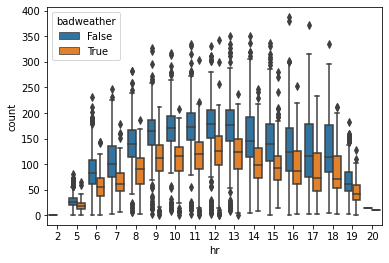

In [ ]:
sns.boxplot(data=mdfsum, y="count", x="hr", hue="badweather")

In [ ]:
mdfsum.groupby("badweather").describe()

count                                    ...  dow                    
              count        mean        std  min   25%  ...  min  25%  50%  75%  max
badweather                                             ...                         
False       13647.0  131.175057  63.229820  1.0  85.0  ...  0.0  1.0  2.0  3.0  4.0
True         1713.0   88.350846  51.782797  1.0  49.0  ...  0.0  1.0  2.0  3.0  4.0

[2 rows x 24 columns]

We can generate a contingency table that shows about a 33% average reduction in citations during bad weather.

In [ ]:
conttable = mdfsum[mdfsum.hr > 2].pivot_table(index="hr", columns="badweather", values="count")
conttable.assign(reduction = lambda r: 1-r[True]/r[False])

badweather,False,True,reduction
hr,,,
5,29.051876,19.243478,0.337617
6,86.721421,57.203252,0.340379
7,104.966851,66.805085,0.363560
8,140.686059,90.330435,0.357929
9,161.950549,110.318966,0.318811
10,169.285871,110.831858,0.345298
11,173.533769,116.103774,0.330944
12,176.965104,124.407407,0.296995
13,175.432671,119.767241,0.317304


While not required for the assignment, a $\chi^2$ test does not establish independence ($p\approx 1$).

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(conttable.values, False)

(1.2393926280151768,
 0.9999988581243332,
 15,
 array([[ 28.73206815,  19.56328649],
        [ 85.62424968,  58.300423  ],
        [102.1912562 ,  69.58067937],
        [137.43726909,  93.57922497],
        [161.97968351, 110.28983146],
        [166.64877491, 113.46895425],
        [172.31234094, 117.32520171],
        [179.29375588, 122.07875512],
        [175.62152854, 119.57838393],
        [153.63249304, 104.60633949],
        [145.87851365,  99.32675713],
        [134.16676105,  91.35237916],
        [127.60304554,  86.88323178],
        [126.93137086,  86.42589735],
        [ 66.50112305,  45.27973814],
        [ 14.87310134,  10.12689866]]))